In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler

In [2]:
db = np.loadtxt('../Frogs_MFCCs.data', delimiter = ',')
#Bufonidae - Rhinella - Rhinellagranulosa
#Dendrobatidae - Ameerega - Ameeregatrivittata
#Hylidae - 1.Dendropsophus, 2.Hypsiboas, 3.Osteocephalus, 4.Scinax - 1.HylaMinuta, 2.HypsiboasCinerascens, 2.HypsiboasCordobae, 3.OsteocephalusOophagus, 4.ScinaxRuber
#Leptodactylidae - 1.Adenomera, 2.Leptodactylus - 1.AdenomeraAndre, 1.AdenomeraHylaedactylus, 2.LeptodactylusFuscus

#Muestras
X = db[:, 0:22]

#Familias
Y = db[:, 22:25]

#Grupos
G = db[:, 25]

In [3]:
def fisher_index(X, plot=True):
    C = X.shape[1]
    indexes = np.zeros(22)

    j = 0
    for i in range(C):
        if_j = 0
        for k in range(C):
            if i == k:
                continue
            mean_i = np.mean(X[:,i])
            mean_k = np.mean(X[:,k])
            std_i = np.std(X[:,i])
            std_k = np.std(X[:,k])

            if_j += ((mean_i - mean_k)**2 )/(std_i**2 + std_k**2)
        indexes[j] = if_j
        j += 1

    indexes = indexes / np.max(indexes)
  
    if plot == True:
        x = np.array(np.linspace(0, C, C, endpoint=True))
        y = indexes
        plt.stem(x, y)
        plt.xlabel('Variables')
        plt.ylabel('Índice de fisher')
        plt.show()    
    return indexes

## Capacidad de discriminante de las caracteristicas (Normalizando)

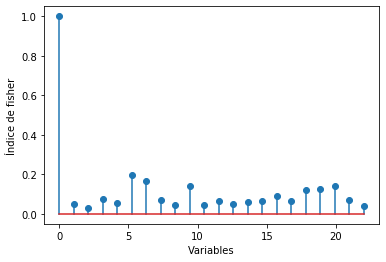

array([1.        , 0.05242421, 0.0276    , 0.07667342, 0.05499909,
       0.19702915, 0.16629743, 0.07039104, 0.04452588, 0.14150769,
       0.0466486 , 0.06524056, 0.05175513, 0.05864423, 0.06625096,
       0.08897223, 0.06641933, 0.11881675, 0.12583666, 0.13974483,
       0.07273818, 0.03876263])

In [4]:
XA = X
scaler = MinMaxScaler()
Xt = scaler.fit_transform(XA)
fisher_index(Xt)

## Capacidad de discriminante de las caracteristicas

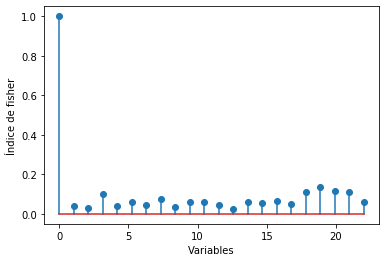

array([1.        , 0.04047631, 0.02855044, 0.10114567, 0.03923618,
       0.06148148, 0.04423424, 0.07742675, 0.03380527, 0.06017654,
       0.05819481, 0.04562763, 0.02712064, 0.05956758, 0.05476748,
       0.06701657, 0.05106246, 0.11155476, 0.13480469, 0.11797166,
       0.11168196, 0.05996469])

In [5]:
fisher_index(X)